Using matplotlib as 2D backend.
___MEG QC___:  list_of_subs ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28']
___MEG QC___:  Take SID:  01
___MEG QC___:  Starting initial processing...
___MEG QC___:  data_file /Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003694/sub-01/meg/sub-01_task-MEM_run-01_meg.fif
___MEG QC___:  Reading data from file: /Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003694/sub-01/meg/sub-01_task-MEM_run-01_meg.fif
Opening raw data file /Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003694/sub-01/meg/sub-01_task-MEM_run-01_meg.fif...
    Read a total of 13 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idl

  0%|          | cHPI amplitudes : 0/11993 [00:00<?,       ?it/s]

Computing 4385 HPI location guesses (1 cm grid in a 10.7 cm sphere)
HPIFIT: 4 coils digitized in order 2 4 3 1
HPI consistency of isotrak and hpifit is OK.


  0%|          | cHPI locations  : 0/11993 [00:00<?,       ?it/s]

___MEG QC___:  Finished. --- Execution 36.70176720619202 seconds ---
___MEG QC___:  Start computing head positions...
    t=14.000:    3/4 good HPI fits, movements [mm/s] =      0.2 /      0.3 /      0.2 /      0.1
    t=15.000:    3/4 good HPI fits, movements [mm/s] =      0.0 /      0.0 /      0.0 /      0.0
    t=16.000:    3/4 good HPI fits, movements [mm/s] =      0.0 /      0.0 /      0.1 /      0.0
    t=17.000:    3/4 good HPI fits, movements [mm/s] =      0.1 /      0.1 /      0.1 /      0.1
    t=18.000:    3/4 good HPI fits, movements [mm/s] =      0.1 /      0.1 /      0.2 /      0.0
    t=19.000:    3/4 good HPI fits, movements [mm/s] =      0.1 /      0.1 /      0.1 /      0.1
    t=20.000:    3/4 good HPI fits, movements [mm/s] =      0.3 /      0.2 /      0.4 /      0.1
    t=21.000:    3/4 good HPI fits, movements [mm/s] =      0.1 /      0.1 /      0.2 /      0.1
    t=22.000:    3/4 good HPI fits, movements [mm/s] =      0.2 /      0.1 /      0.1 /      0.1
    t=23.

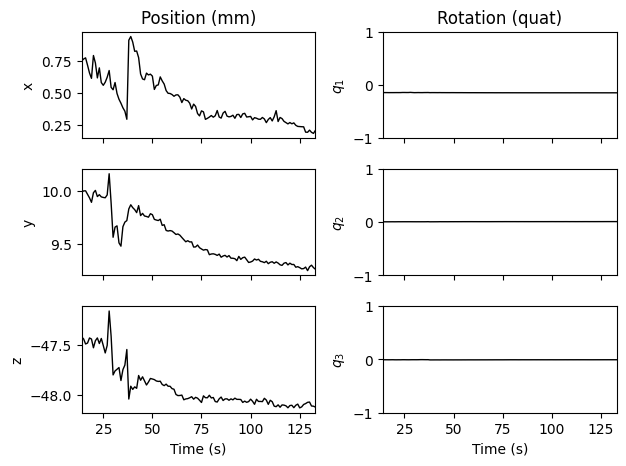

___MEG QC___:  Std of head positions in mm:  0.0736934500729549
___MEG QC___:  Std of head rotations in quat:  0.000656538239563388
___MEG QC___:  Max movement (x, y, z) in mm:  [0.3787853001733683, 0.4556047990236303, 0.8048524224277265]
___MEG QC___:  Max rotation (q1, q2, q3) in quat:  [0.008174114515191316, 0.003988535239091262, 0.005253103087182076]
___MEG QC___:  Finished Head movement calculation. --- Execution 43.779853105545044 seconds ---
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-table/bootstrap-table.min.css
Embedding : bootstrap-table/bootstrap-table-copy-rows.min.js
Embedding : bootstrap-table/bootstrap-table-export.min.js
Embedding : bootstrap-table/tableExport.min.js
Embedding : bootstrap-icons/bootstrap-icons.mne.min.css
Embedding : highlightjs/highlight.min.js
Embedding : highlightjs/atom-one-dark-reasonable.min.css
Overwriting existing file.

<Raw | sub-01_task-MEM_run-01_meg.fif, 327 x 60000 (120.0 s), ~155.1 MB, data loaded>

In [1]:
from main_meg_qc import make_derivative_meg_qc

config_file_name = 'settings.ini'
raw, raw_cropped_filtered_resampled, QC_derivs, QC_simple, df_head_pos, head_pos = make_derivative_meg_qc(config_file_name)

raw_cropped_filtered_resampled

In [ ]:
import numpy as np
#make empty np array of size 0:
ar=np.empty([0])

ar.size

In [ ]:
bool('True')

In [ ]:
fi = [1, 3, 5, 7, 3, 6, 9]
import numpy as np

#calculate the root means square error of f:
STD = np.sqrt(np.mean(np.square(fi)))

#calculate the standard deviation of f:
std = np.std(fi)

STD==std

from STD_meq_qc import STD
STD2=STD(fi)
print(STD, std, STD2)

In [ ]:
import mne
picks_EOG = mne.pick_types(raw.info, eog=True)
eog_ch_name = [raw.info['chs'][name]['ch_name'] for name in picks_EOG]
eog_ch_name

In [ ]:
n=5.1

if n % 1 == 0:
    print('yes')

In [ ]:
#plot epochs 
%matplotlib qt

import mne
events = mne.find_events(raw_cropped_filtered_resampled, min_duration=0.2)
epochs = mne.Epochs(raw_cropped_filtered_resampled, events, tmin=-0.2, tmax=0.5, baseline=None, preload=True)

epochs.plot(picks='mag')

In [ ]:
df_head_pos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mne
import configparser
import ancpbids
import plotly
import pandas as pd

from main_meg_qc import make_derivative_meg_qc
from initial_meg_qc import get_all_config_params, sanity_check, initial_processing
from STD_meq_qc import STD_meg_qc
from PSD_meg_qc import PSD_meg_qc
from Peaks_manual_meg_qc import PP_manual_meg_qc
from Peaks_auto_meg_qc import PP_auto_meg_qc
from ECG_EOG_meg_qc import ECG_meg_qc, EOG_meg_qc
from universal_html_report import keep_fig_derivs, make_joined_report
import time


In [ ]:
from STD_meq_qc import get_noisy_flat_STD_ptp_epochs

m_or_g = 'mag'
noisy_multipliar = 1
flat_multipliar = 1
allow_percent_noisy = 70

# convert csv file to dataframe:
csv_df = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003483/derivatives/Meg_QC/sub-013/sub-013_ses-1_task-deduction_run-1_desc-std_per_epoch_mag_meg.csv'
df_std = pd.read_csv(csv_df, index_col=0)

from universal_plots import QC_derivative

def get_noisy_flat_STD_ptp_epochs(df_std: pd.DataFrame, ch_type: str, std_or_ptp: str, noisy_multiplier: float, flat_multiplier: float, percent_noisy_flat_allowed: float):
    
    """Compare the std of this channel for this epoch (df_std) TO the mean STD of this particular channel over all time. (or over all epchs!)
    Use some multiplier to figure out by how much it is noisier."""

    epochs = df_std.columns.tolist()
    # convert strings to ints:
    epochs = [int(ep) for ep in epochs]

    df_std['mean'] = df_std.mean(axis=1) #mean of stds for each separate channel over all epochs together

    #compare mean std of each channel to std of this channel for every epoch:
    df_noisy_epoch=df_std.copy()
    df_flat_epoch=df_std.copy()
    df_epoch_vs_mean=df_std.copy()

    # Now see which channles in epoch are over std_level or under -std_level:
    
    for ep in epochs:  

        df_epoch_vs_mean.iloc[:,ep] = df_epoch_vs_mean.iloc[:,ep]/ df_std.iloc[:, -1]

        df_noisy_epoch.iloc[:,ep] = df_noisy_epoch.iloc[:,ep]/ df_std.iloc[:, -1] > noisy_multiplier
        df_flat_epoch.iloc[:,ep] = df_flat_epoch.iloc[:,ep]/ df_std.iloc[:, -1] < flat_multiplier

        # Now check if the epoch has over 70% of noisy/flat channels in it -> it is a noisy/flat epoch:

        df_noisy_epoch.iloc[-1,ep] = df_noisy_epoch.iloc[:,ep].sum() > len(df_noisy_epoch)*percent_noisy_flat_allowed/100
        df_flat_epoch.iloc[-1,ep] = df_flat_epoch.iloc[:,ep].sum() > len(df_flat_epoch)*percent_noisy_flat_allowed/100

    df_noisy_epoch.rename({df_noisy_epoch.index[-1]: 'noisy: > %s perc' % percent_noisy_flat_allowed}, inplace=True)
    df_flat_epoch.rename({df_flat_epoch.index[-1]: 'flat: > %s perc' % percent_noisy_flat_allowed}, inplace=True)

    # Create derivatives:
    noisy_flat_epochs_derivs = [
        QC_derivative(df_epoch_vs_mean, std_or_ptp+'_per_epoch_vs_mean_ratio_'+ch_type, 'df'),
        QC_derivative(df_noisy_epoch, 'Noisy_epochs_on_'+std_or_ptp+'_base_'+ch_type, 'df'),
        QC_derivative(df_flat_epoch, 'Flat_epochs_on_'+std_or_ptp+'_base_'+ch_type, 'df')]

    return noisy_flat_epochs_derivs

noisy_flat_epochs_derivs = get_noisy_flat_STD_ptp_epochs(df_std, m_or_g, 'std', noisy_multipliar, flat_multipliar, allow_percent_noisy)


In [ ]:


noisy_flat_epochs_derivs[1].content


In [ ]:
from main_meg_qc import get_all_config_params, initial_processing
all_qc_params=get_all_config_params('settings.ini')
#print('___MEG QC___: ', all_qc_params)

data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003483/sub-009/ses-1/meg/sub-009_ses-1_task-deduction_run-1_meg.fif' #GOOD ECG CHANNEL
#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from lab/mikado/sub_HT05ND16/210811/mikado-1.fif' #NO ECG CHANNEL, GOOD RECONSTRUCT


#data_file='/Volumes/M2_DATA/MEG_QC_stuff/data/from lab/forrest_gump_meg/en04ns31_vp15/190524/vp15_block1-1.fif'  #BAD ECG CHANNEL, 2 good eog.

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds004229/sub-102/meg/sub-102_task-amnoise_meg.fif' #2EOG channels, both bad

data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003703/sub-a68d5xp5/meg/sub-a68d5xp5_task-listeningToSpeech_run-01_meg.fif'
#2EOG channels, both bad. HEAD WORKS

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds004107/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'
#normal psd

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds004107/sub-mind004/ses-01/meg/sub-mind004_ses-01_task-auditory_meg.fif'
#normal but difficult psd

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds004107/sub-mind002/ses-01/meg/sub-mind002_ses-01_task-auditory_meg.fif'
#EOG 061 bad (or rather unusual), EOG 062 good. Mne takes only the good channel and calculates events on base of it -  
# my average and other plots are only on base of 1 goodchannel automatically

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003682/sub-003/ses-01/meg/sub-003_ses-01_task-AversiveLearningReplay_run-01_meg.fif'

#dict_of_dfs_epoch, dict_epochs_mg, channels, raw_bandpass, raw_filtered_resampled, raw_cropped, raw, active_shielding_used = initial_processing(default_settings=all_qc_params['default'], filtering_settings=all_qc_params['Filtering'], epoching_params=all_qc_params['Epoching'], data_file=data_file)

raw = mne.io.read_raw_fif(data_file, allow_maxshield=True)
raw_cropped = raw.copy()
tmin_my_plot=200
tmax_my_plot=300
duration_my_plot=tmax_my_plot-tmin_my_plot
raw_cropped.crop(tmin=tmin_my_plot, tmax=tmax_my_plot)

#raw_cropped.drop_channels(ECG_channel_name)

raw_cropped
raw

In [ ]:

from Head_meg_qc import HEAD_movement_meg_qc

head_derivs, simple_metrics_head, head_not_calculated, df_head_pos, head_pos = HEAD_movement_meg_qc(raw_cropped, plot_with_lines=True, plot_annotations=False)



In [ ]:
from mne.preprocessing import annotate_movement, compute_average_dev_head_t
from universal_plots import QC_derivative
from plotly.subplots import make_subplots

def make_head_pos_plot(raw, head_pos):

    ''' Plot positions and rotations of the head'''

    head_derivs = []

    original_head_dev_t = mne.transforms.invert_transform(
        raw.info['dev_head_t'])
    average_head_dev_t = mne.transforms.invert_transform(
        compute_average_dev_head_t(raw, head_pos))

    #plot using mne:
    fig1 = mne.viz.plot_head_positions(head_pos, mode='traces')
    #fig1 = mne.viz.plot_head_positions(head_pos_degrees)
    for ax, val, val_ori in zip(fig1.axes[::2], average_head_dev_t['trans'][:3, 3],
                        original_head_dev_t['trans'][:3, 3]):
        ax.axhline(1000*val, color='r')
        ax.axhline(1000*val_ori, color='g')
        #print('___MEG QC___: ', 'val', val, 'val_ori', val_ori)
    # The green horizontal lines represent the original head position, whereas the
    # Red lines are the new head position averaged over all the time points.

    head_derivs += [QC_derivative(fig1, 'Head_position_rotation_average', 'matplotlib', description_for_user = 'The green horizontal lines - original head position. Red lines - the new head position averaged over all the time points.')]


    #plot head_pos using plotly

    # First, for each head position subtract the first point from all the other points to make it always deviate from 0:
    head_pos_baselined=head_pos.copy()
    #head_pos_baselined=head_pos_degrees.copy()
    for i, pos in enumerate(head_pos_baselined.T[1:7]):
        pos -= pos[0]
        head_pos_baselined.T[i]=pos

    t = head_pos.T[0]

    average_head_pos=average_head_dev_t['trans'][:3, 3]
    original_head_pos=original_head_dev_t['trans'][:3, 3]

    fig1p = make_subplots(rows=3, cols=2, subplot_titles=("Position (mm)", "Rotation (quats)"))

    # head_pos ndarray of shape (n_pos, 10): [t, q1, q2, q3, x, y, z, gof, err, v]
    # https://mne.tools/stable/generated/mne.chpi.compute_head_pos.html
    indexes=[4, 5, 6, 1, 2,3]
    names=['x', 'y', 'z', 'q1', 'q2', 'q3']
    for counter in [0, 1, 2]:
        position=1000*-head_pos.T[indexes][counter]
        name_pos=names[counter]
        fig1p.add_trace(go.Scatter(x=t, y=position, mode='lines', name=name_pos), row=counter+1, col=1)
        fig1p.update_yaxes(title_text=name_pos, row=counter+1, col=1)
        #print('name', name_pos, 'position', position)
        rotation=1000*head_pos.T[indexes][counter+3]
        name_rot=names[counter+3]
        fig1p.add_trace(go.Scatter(x=t, y=rotation, mode='lines', name=name_rot), row=counter+1, col=2)
        fig1p.update_yaxes(title_text=name_rot, row=counter+1, col=2)
        #print('name', name_rot, 'rotation', rotation)

        # fig1p.add_hline(y=1000*average_head_pos[counter], line_dash="dash", line_color="red", row=counter+1, col=1)
        # fig1p.add_hline(y=1000*original_head_pos[counter], line_dash="dash", line_color="green", row=counter+1, col=1)

    fig1p.update_xaxes(title_text='Time (s)', row=3, col=1)
    fig1p.update_xaxes(title_text='Time (s)', row=3, col=2)
    fig1p.show()
    head_derivs += [QC_derivative(fig1p, 'Head_position_rotation_average_plotly', 'plotly', description_for_user = 'The green horizontal lines - original head position. Red lines - the new head position averaged over all the time points.')]

    return head_derivs, head_pos_baselined

head_derivs, head_pos_baselined= make_head_pos_plot(raw_cropped, head_pos)

In [ ]:
df_head_pos

In [ ]:
from universal_plots import get_tit_and_unit
from scipy.signal import find_peaks, peak_widths
from PSD_meg_qc import make_simple_metric_psd
import numpy as np


def split_blended_freqs_old(noisy_freq_bands_idx, width_heights, freqs):

    band = 0
    while band < len(noisy_freq_bands_idx):

        # Checking if the last element of every band is contained in the current band
        last = 0
        while last < len(noisy_freq_bands_idx):

            if (noisy_freq_bands_idx[last] != noisy_freq_bands_idx[band]) and (noisy_freq_bands_idx[last][-1] in noisy_freq_bands_idx[band]):
                
                #if yes - split the biggest band at the split point and also assign the same heights of peaks to both parts.

                split_index = noisy_freq_bands_idx[band].index(noisy_freq_bands_idx[last][-1])
                #split_index = noisy_freq_bands_idx[last][-1] ???

                split_band_left = noisy_freq_bands_idx[band][:split_index+1]
                split_band_right = noisy_freq_bands_idx[band][split_index+1:]


                noisy_freq_bands_idx[last] = split_band_left
                noisy_freq_bands_idx[band] = split_band_right

                min_width_heights = min(width_heights[last],width_heights[band])
                width_heights[band] = min_width_heights
                width_heights[last] = min_width_heights


                #set both bands to 0, so next time  the check will be done for all the bands from the beginning, 
                # concedering new state of noisy_freq_bands_idx:
                band = 0
                last = 0

            last += 1
        band += 1

    return noisy_freq_bands_idx, width_heights

def split_blended_freqs(noisy_freq_bands_idx, peaks, peaks_neg, width_heights, freqs):

    print('___MEG QC___: ', 'peaks_neg', peaks_neg)
    print('___MEG QC___: ', 'width_weights:', width_heights)

    for n_peak, _ in enumerate(peaks):

        #find negative peaks before and after closest to the found positive noise peak.
  
        neg_peak_before=peaks_neg[np.argwhere(peaks_neg<peaks[n_peak])[-1][0]]
        neg_peak_after=peaks_neg[np.argwhere(peaks_neg>peaks[n_peak])[0][0]]

        #print('___MEG QC___: ', 'target peak', peaks[n_peak])
        #print('___MEG QC___: ', 'before and after', neg_peak_before, neg_peak_after)
     
        if noisy_freq_bands_idx[n_peak][0] < neg_peak_before:
            noisy_freq_bands_idx[n_peak] = [i for i in range(neg_peak_before, noisy_freq_bands_idx[n_peak][-1])]
            #print('___MEG QC___: ', 'new band', noisy_freq_bands_idx[n_peak])

            #if true, then this peak was blended with another one, 
            # so the bottom of both peaks (this and previous) needs to be brought 
            # to the same value.
            # (except the case when there were no peaks before)
            if n_peak>0:
                min_width_heights = min(width_heights[n_peak-1],width_heights[[n_peak]])
                width_heights[n_peak-1] = min_width_heights
                width_heights[n_peak] = min_width_heights

        if noisy_freq_bands_idx[n_peak][-1] > neg_peak_after:
            noisy_freq_bands_idx[n_peak] = [i for i in range(noisy_freq_bands_idx[n_peak][0], neg_peak_after)]

            #if true, then this peak was blended with another one, 
            # so the bottom of both peaks (this and next) needs to be brought 
            # to the same value.
            # (except the case when there are no peaks after)
            if n_peak<len(peaks)-1:
                min_width_heights = min(width_heights[n_peak],width_heights[[n_peak+1]])
                width_heights[n_peak] = min_width_heights
                width_heights[n_peak+1] = min_width_heights

    return noisy_freq_bands_idx, width_heights


def find_number_and_power_of_noise_freqs(freqs, psds, helper_plots: bool, m_or_g):

    """
    # 1. Calculate average psd curve over all channels
    # 2. Run peak detection on it -> get number of noise freqs
    # 2*. Split blended freqs
    # 3. Fit curve to the general psd OR cut the noise peaks at the point they start and baseline them to 0.
    # 4. Calculate area under the curve for each noisy peak: area is limited to where amplitude crosses the fitted curve. - count from there."""

    m_or_g_tit, unit = get_tit_and_unit(m_or_g)

    #1.
    avg_psd=np.mean(psds,axis=0)

    #2. 
     
    prominence=(max(avg_psd) - min(avg_psd)) / 50
    peaks, _ = find_peaks(avg_psd, prominence=prominence)
    peaks_neg, _ = find_peaks(-avg_psd, prominence=prominence)
    peaks_neg = np.insert(peaks_neg, 0, 0, axis=0)
    peaks_neg = np.append(peaks_neg, len(freqs)-1)
    #insert 0 as index of first negative peak and last index as ind of lastr negative peak.


    widths, width_heights, left_ips, right_ips = peak_widths(avg_psd, peaks, rel_height=1)

    #Plot signal, peaks and contour lines at which the widths where calculated
    from PSD_meg_qc import Power_of_band
    from universal_plots import plot_pie_chart_freq
    from scipy.integrate import simps

    print('___MEG QC___: ', 'Central Freqs: ', freqs[peaks])
    print('___MEG QC___: ', 'Central Amplitudes: ', avg_psd[peaks])
    print('___MEG QC___: ', 'width_heights: ', width_heights)


    avg_psd_only_signal=avg_psd.copy()
    avg_psd_only_peaks=avg_psd.copy()
    avg_psd_only_peaks[:]=None
    avg_psd_only_peaks_baselined=avg_psd.copy()
    avg_psd_only_peaks_baselined[:]=0

    noisy_freq_bands_idx=[]
    for ip_n, _ in enumerate(peaks):
        #noisy_freq_bands_idx.append([fr for fr in np.arange((round(left_ips[ip_n])), round(right_ips[ip_n]))])

        #+1 here because I  will use these values as range,and range in python is usually "up to the value but not including", this should fix it to the right rang
        noisy_freq_bands_idx.append([fr for fr in np.arange((round(left_ips[ip_n])), round(right_ips[ip_n])+1)])
        if noisy_freq_bands_idx[ip_n][0]==noisy_freq_bands_idx[ip_n-1][-1]:
            noisy_freq_bands_idx[ip_n-1].pop(-1)
        #in case the las  element of one band is the same as first of another band, remove the last  elemnt of previos.So bands dont cross.

    #2*
    print('___MEG QC___: ', 'HERE! BEFORE SPLIT')
    print('___MEG QC___: ', noisy_freq_bands_idx)
    #noisy_freq_bands_idx_split, width_heights_split = split_blended_freqs(noisy_freq_bands_idx, width_heights, freqs)

    noisy_freq_bands_idx_split, width_heights_split = split_blended_freqs(noisy_freq_bands_idx, peaks, peaks_neg, width_heights, freqs)
    print('___MEG QC___: ', 'HERE! AFTER SPLIT')
    print('___MEG QC___: ', noisy_freq_bands_idx_split)


    #3.
    ips_l, ips_r = [], []
    for fr_n, fr_b in enumerate(noisy_freq_bands_idx_split):
        ips_l.append(freqs[fr_b][0])
        ips_r.append(freqs[fr_b][-1])
        
        avg_psd_only_signal[fr_b]=None #keep only main psd, remove noise bands, just for visual
        avg_psd_only_peaks[fr_b]=avg_psd[fr_b].copy() #keep only noise bands, remove psd, again for visual
        avg_psd_only_peaks_baselined[fr_b]=avg_psd[fr_b].copy()-[width_heights_split[fr_n]]*len(avg_psd_only_peaks[fr_b])
        #keep only noise bands and baseline them to 0 (remove the signal which is under the noise line)

        # clip the values to 0 if they are negative, they might appear in the beginning of psd curve, 
        # because the first peak might be above even the higher part of psd. should look intp it? 
        # maybe that pesk should not be seen as peak at all?
        avg_psd_only_peaks_baselined=np.array(avg_psd_only_peaks_baselined) 
        avg_psd_only_peaks_baselined = np.clip(avg_psd_only_peaks_baselined, 0, None) 


    if helper_plots is True:
        import matplotlib.pyplot as plt

        fig, axs = plt.subplots(2, 2, figsize=(13, 8))

        axs[0, 0].plot(freqs,avg_psd)
        axs[0, 0].plot(freqs[peaks], avg_psd[peaks], 'x')
        axs[0, 0].plot(freqs[peaks_neg], avg_psd[peaks_neg], 'o')
        xmin_f=[round(l) for l in left_ips]
        xmax_f=[round(r) for r in right_ips]
        xmin=[freqs[i] for i in xmin_f]
        xmax=[freqs[i] for i in xmax_f]
        axs[0, 0].hlines(y=width_heights, xmin=xmin, xmax=xmax, color="C3")
        axs[0, 0].set_title('1. PSD Welch with peaks, blended freqs not split yet. \n Shown as detected by peak_widths')
        axs[0, 0].set_xlim(freqs[0], freqs[-1])
        axs[0, 0].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[0, 1].plot(freqs,avg_psd_only_signal)
        axs[0, 1].plot(freqs[peaks], avg_psd_only_signal[peaks], "x")
        axs[0, 1].hlines(y=width_heights, xmin=ips_l, xmax=ips_r, color="C3")
        axs[0, 1].set_title('2. PSD without noise, split blended freqs')
        axs[0, 1].set_xlim(freqs[0], freqs[-1])
        axs[0, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[1, 0].plot(freqs,avg_psd_only_peaks)
        axs[1, 0].plot(freqs[peaks], avg_psd_only_peaks[peaks], "x")
        axs[1, 0].hlines(y=width_heights, xmin=ips_l, xmax=ips_r, color="C3")
        axs[1, 0].set_title('3. Only noise peaks, split blended freqs')
        axs[1, 0].set_xlim(freqs[0], freqs[-1])
        axs[1, 0].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[1, 1].plot(freqs,avg_psd_only_peaks_baselined)
        axs[1, 1].plot(freqs[peaks], avg_psd_only_peaks_baselined[peaks], "x")
        axs[1, 1].hlines(y=[0]*len(freqs[peaks]), xmin=ips_l, xmax=ips_r, color="C3")
        axs[1, 1].set_title('4. Noise peaks brought to basline, split blended freqs')
        axs[1, 1].set_xlim(freqs[0], freqs[-1])
        axs[1, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        plt.tight_layout()
        fig.show()


    #4.
    freq_res = freqs[1] - freqs[0]
    total_power = simps(avg_psd, dx=freq_res) # power of all signal
    print('___MEG QC___: ', 'Total power: ', total_power)

    all_bp_noise=[]
    all_bp_relative=[]
    bp_noise_relative_to_signal=[]

    avg_psd_only_peaks_baselined_new=np.array([avg_psd_only_peaks_baselined]) 

    for fr_n, fr_b in enumerate(noisy_freq_bands_idx_split):

        #print('___MEG QC___: ', 'band',  freqs[fr_b][0], freqs[fr_b][-1])
        bp_noise, _, bp_relative = Power_of_band(freqs=freqs, f_low = freqs[fr_b][0], f_high= freqs[fr_b][-1], psds=avg_psd_only_peaks_baselined_new)

        all_bp_noise+=bp_noise
        all_bp_relative+=bp_relative

        #Calculate how much of the total power of the average signal goes into each of the noise freqs:
        bp_noise_relative_to_signal.append(bp_noise / total_power) # relative power: % of this band in the total bands power for this channel:

    bp_noise_relative_to_signal=[r[0] for r in bp_noise_relative_to_signal]

    #print('___MEG QC___: ', 'Freq band for each peak:', ips_pair)
    print('___MEG QC___: ', 'BP', all_bp_noise)
    print('___MEG QC___: ', 'relative BP', all_bp_relative)
    print('___MEG QC___: ', 'Amount of noisy freq in total signal', bp_noise_relative_to_signal)


    #Legend for the pie chart:
    bands_legend=[]
    for fr_n, fr in enumerate(freqs[peaks]):
        bands_legend.append(str(fr)+' Hz noise: '+str(all_bp_noise[fr_n])+' '+unit)
    main_signal_legend='Main signal: '+str(total_power-sum(all_bp_noise))+' '+unit
    bands_legend.append(main_signal_legend)
    #bands_legend=[str(fr)+' Hz noise' for fr in freqs[peaks]]+['Main signal'] #legend version without showing the abs power

    Snr=bp_noise_relative_to_signal+[1-sum(bp_noise_relative_to_signal)]
    noise_pie_derivative = plot_pie_chart_freq(mean_relative_freq=Snr, tit='Signal and Noise. '+m_or_g_tit, bands_names=bands_legend)
    noise_pie_derivative.content.show()

    simple_metric_deriv=make_simple_metric_psd(all_bp_noise, bp_noise_relative_to_signal, m_or_g, freqs, peaks)

    return noise_pie_derivative, simple_metric_deriv


In [ ]:
peaks_neg=np.array([3,   5,   8,  11,  13,  16,  27, 116])
peaks_neg = np.insert(peaks_neg, 0, 0, axis=0)
peaks_neg = np.append(peaks_neg, len(freqs))

print('___MEG QC___: ', 'new', peaks_neg)

peaks=[  4,   7,   9,  12,  14,  21,  33, 119]
noisy_freq_bands_idx=[[3, 4], [5, 6, 7], [8, 9, 10], [11, 12], [13, 14, 15, 16], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], [116, 117, 118, 119, 120, 121]]
width_heights=[2.46641238e-27, 1.91667602e-27, 1.63137469e-27, 1.63569180e-27, 1.70866416e-27, 1.42336105e-27, 2.05153813e-27, 7.53606847e-29]

noisy_freq_bands_idx_new, width_heights=split_blended_freqs(noisy_freq_bands_idx, peaks, peaks_neg, width_heights, freqs)




In [ ]:
width_heights

In [ ]:
m_or_g='mag'

noise_pie_derivative, simple_metric_deriv = find_number_and_power_of_noise_freqs(freqs, psds, True, m_or_g)

In [ ]:


from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter, argrelextrema
import pandas as pd

# Distance away from the FBEWMA that data should be removed.
DELTA = 88.0
# clip data above this value:
HIGH_CLIP = 99.0
# clip data below this value:
LOW_CLIP = -99.0
# How many samples to run the FBEWMA over.
SPAN = 5

def clip_data(np_unclipped, high_clip, low_clip):
    ''' Clip unclipped between high_clip and low_clip. 
    unclipped contains a single column of unclipped data.'''
    
    # clip data above HIGH_CLIP or below LOW_CLIP
    cond_high_clip = (np_unclipped > HIGH_CLIP) | (np_unclipped < LOW_CLIP)
    np_clipped = np.where(cond_high_clip, np.nan, np_unclipped)
    return np_clipped.tolist()

def ewma_fb(df_column, span):
    ''' Apply forwards, backwards exponential weighted moving average (EWMA) to df_column. '''
    # Forwards EWMA.
    df_column_pd = pd.DataFrame(df_column)
    fwd = pd.Series.ewm(df_column_pd, span=span).mean()
    # Backwards EWMA.
    bwd = pd.Series.ewm(df_column_pd[::-1],span=10).mean()
    # Add and take the mean of the forwards and backwards EWMA.
    stacked_ewma = np.vstack(( fwd, bwd[::-1] ))
    fb_ewma = np.mean(stacked_ewma, axis=0)
    return fb_ewma

def remove_outliers(np_spikey, np_fbewma, delta):
    ''' Remove data from df_spikey that is > delta from fbewma. '''
    cond_delta = (np.abs(np_spikey-np_fbewma) > delta)
    np_remove_outliers = np.where(cond_delta, np.nan, np_spikey)
    return pd.DataFrame(np_remove_outliers)


y_clipped = clip_data(avg_psd, HIGH_CLIP, LOW_CLIP)
y_ewma = ewma_fb(y_clipped, SPAN)
y_outliers_removed = remove_outliers(y_clipped, y_ewma, DELTA)
y_interpolated = y_outliers_removed.interpolate().to_numpy()

# x = freqs, y = avg_psd
x = freqs
y = avg_psd

def filter_freqs_avg_psd(x, y):

    # Define window size (width of the convolution window)
    window_size = 140

    # Define the order of the filter (polynomial order)
    filter_order = 2

    # apply the filter to the data
    return savgol_filter(y, window_size, filter_order)


y_filtered = filter_freqs_avg_psd(x, y)

fig = go.Figure()

fig.add_trace(go.Scatter(x=freqs, y=avg_psd, name='data'))
# fig.add_trace(go.Scatter(x=freqs, y=y_filtered, name='new'))
fig.add_trace(go.Scatter(x=freqs, y=y_outliers_removed, name='y_outliers_removed'))
fig.add_trace(go.Scatter(x=freqs, y=y_interpolated, name='interpolated'))

fig.show()

In [ ]:
from universal_plots import get_tit_and_unit
from scipy.signal import find_peaks, peak_widths
from PSD_meg_qc import make_simple_metric_psd
import numpy as np

def split_blended_freqs(noisy_freq_bands_idx, width_heights, freqs):

    band = 0
    while band < len(noisy_freq_bands_idx):

        # Checking if the last element of every band is contained in the current band
        last = 0
        while last < len(noisy_freq_bands_idx):

            if (noisy_freq_bands_idx[last] != noisy_freq_bands_idx[band]) and (noisy_freq_bands_idx[last][-1] in noisy_freq_bands_idx[band]):
                
                #if yes - split the biggest band at the split point and also assign the same heights of peaks to both parts.

                split_index = noisy_freq_bands_idx[band].index(noisy_freq_bands_idx[last][-1])
                #split_index = noisy_freq_bands_idx[last][-1] ???

                split_band_left = noisy_freq_bands_idx[band][:split_index+1]
                split_band_right = noisy_freq_bands_idx[band][split_index+1:]


                noisy_freq_bands_idx[last] = split_band_left
                noisy_freq_bands_idx[band] = split_band_right

                min_width_heights = min(width_heights[last],width_heights[band])
                width_heights[band] = min_width_heights
                width_heights[last] = min_width_heights


                #set both bands to 0, so next time  the check will be done for all the bands from the beginning, 
                # concedering new state of noisy_freq_bands_idx:
                band = 0
                last = 0

            last += 1
        band += 1

    return noisy_freq_bands_idx, width_heights


def find_number_and_power_of_noise_freqs(freqs, psds, helper_plots: bool, m_or_g):

    """
    # 1. Calculate average psd curve over all channels
    # 2. Run peak detection on it -> get number of noise freqs
    # 2*. Split blended freqs
    # 3. Fit curve to the general psd OR cut the noise peaks at the point they start and baseline them to 0.
    # 4. Calculate area under the curve for each noisy peak: area is limited to where amplitude crosses the fitted curve. - count from there."""

    m_or_g_tit, unit = get_tit_and_unit(m_or_g)

    #1.
    avg_psd=np.mean(psds,axis=0)

    #2. 
     
    prominence=(max(avg_psd) - min(avg_psd)) / 50
    peaks, _ = find_peaks(avg_psd, prominence=prominence)
    
    #________
    prominence=(max(avg_psd) - min(avg_psd)) / 50
    peaks_neg, _ = find_peaks(-avg_psd, prominence=prominence)
    peaks_neg=[0]+list(peaks_neg)+[len(avg_psd)-1] #take the first point of psd always as the start of noise-free curve
    
    peaks_neg_cut=[] 
    for p_n in range(0, len(peaks_neg)-1):
        if avg_psd[peaks_neg][p_n+1]<=avg_psd[peaks_neg][p_n]:
            peaks_neg_cut.append(peaks_neg[p_n+1])
    peaks_neg_cut=[0]+peaks_neg_cut

#_____
    from scipy.optimize import minimize

    # x = freqs, y = avg_pds
    x = freqs
    y = avg_psd

    # Define the logarithmic function
    def log_func(x, a, b, c):
        return a * np.log(b * x) + c

    # Define the objective function
    def objective(params):
        y_fit = log_func(x, *params)
        diff = y_fit - y
        # Add the constraint of matching the first and last point
        first_last_diff = np.sum([(y_fit[0] - y[0]) ** 2, (y_fit[-1] - y[-1]) ** 2])
        # return the sum of square of the differences and the constraint
        return np.sum(diff ** 2) + first_last_diff

    # Initial guesses for the parameters
    params_0 = [1, 1, 1]

    # Minimize the objective function
    result = minimize(objective, params_0)

    # Get the best-fit parameters
    a, b, c = result.x

    # Use the fitted parameters to calculate y values for the logarithmic curve
    y_fit_another = log_func(x, a, b, c)

#______


    #fit polynomial models up to degree 5
    fig = go.Figure()
    # print('___MEG QC___: ', 'HERE!', freqs[peaks_neg_cut], avg_psd[peaks_neg_cut])
    # model1 = np.polyfit(np.log(freqs[peaks_neg_cut]), avg_psd[peaks_neg_cut], 1)
    # model2 = np.polyfit(np.log(freqs[peaks_neg_cut]), avg_psd[peaks_neg_cut], 2)
    # model3 = np.polyfit(np.log(freqs[peaks_neg_cut]), avg_psd[peaks_neg_cut], 3)
    # model4 = np.polyfit(np.log(freqs[peaks_neg_cut]), avg_psd[peaks_neg_cut], 4)
    # model5 = np.polyfit(np.log(freqs[peaks_neg_cut]), avg_psd[peaks_neg_cut], 5)

    #y = [model1[0]*np.log(freqs)+ model1[1]] 

    from scipy.optimize import curve_fit

    # Define the logarithmic function to fit to the data
    def log_func(x, a, b, c):
        return a * np.log(b * x) + c

    # Use the curve_fit function to fit the logarithmic function to the data
    popt_cut, _ = curve_fit(log_func, freqs[peaks_neg_cut], avg_psd[peaks_neg_cut])

    # Get the parameters of the fit
    a, b, c = popt_cut

    popt_uncut, _ = curve_fit(log_func, freqs, avg_psd)

    # Get the parameters of the fit
    a1, b1, c1 = popt_uncut

    # Use the fitted parameters to calculate y values for the logarithmic curve
    #y_fit = log_func(x, a, b, c)
    y_fit = log_func(freqs, a, b, c)
    y_fit_uncut = log_func(freqs, a1, b1, c1)



    fig.add_trace(go.Scatter(x=freqs, y=avg_psd, name='data'))
    #fig.add_trace(go.Scatter(x=freqs, y=y[0], name='model1')) 
    fig.add_trace(go.Scatter(x=freqs[peaks_neg_cut], y=avg_psd[peaks_neg_cut], mode='markers',name='dots')) 
    fig.add_trace(go.Scatter(x=freqs, y=y_fit, name='cut')) 
    fig.add_trace(go.Scatter(x=freqs, y=y_fit_uncut, name='uncut')) 
    fig.add_trace(go.Scatter(x=freqs, y=y_fit_another, name='another one')) 
    #fig.add_trace(go.Scatter(x=freqs, y=model1(freqs), name='model1')) 
    #fig.add_trace(go.Scatter(x=freqs, y=model2(freqs), name='model2')) 
    #fig.add_trace(go.Scatter(x=freqs, y=model3(freqs), name='model3')) 
    #fig.add_trace(go.Scatter(x=freqs, y=model4(freqs), name='model4')) 
    #fig.add_trace(go.Scatter(x=freqs, y=model5(freqs), name='model5')) 

    fig.show()


    #________


    widths, width_heights, left_ips, right_ips = peak_widths(avg_psd, peaks, rel_height=1)

    #Plot signal, peaks and contour lines at which the widths where calculated
    from PSD_meg_qc import Power_of_band
    from universal_plots import plot_pie_chart_freq
    from scipy.integrate import simps

    print('___MEG QC___: ', 'Central Freqs: ', freqs[peaks])
    print('___MEG QC___: ', 'Central Amplitudes: ', avg_psd[peaks])
    print('___MEG QC___: ', 'width_heights: ', width_heights)


    avg_psd_only_signal=avg_psd.copy()
    avg_psd_only_peaks=avg_psd.copy()
    avg_psd_only_peaks[:]=None
    avg_psd_only_peaks_baselined=avg_psd.copy()
    avg_psd_only_peaks_baselined[:]=0

    noisy_freq_bands_idx=[]
    for ip_n, _ in enumerate(peaks):
        #noisy_freq_bands_idx.append([fr for fr in np.arange((round(left_ips[ip_n])), round(right_ips[ip_n]))])

        #+1 here because I  will use these values as range,and range in python is usually "up to the value but not including", this should fix it to the right rang
        noisy_freq_bands_idx.append([fr for fr in np.arange((round(left_ips[ip_n])), round(right_ips[ip_n])+1)])
        if noisy_freq_bands_idx[ip_n][0]==noisy_freq_bands_idx[ip_n-1][-1]:
            noisy_freq_bands_idx[ip_n-1].pop(-1)
        #in case the las  element of one band is the same as first of another band, remove the last  elemnt of previos.So bands dont cross.

    #2*
    print('___MEG QC___: ', 'HERE! BEFORE SPLIT')
    print('___MEG QC___: ', noisy_freq_bands_idx)
    noisy_freq_bands_idx_split, width_heights_split = split_blended_freqs(noisy_freq_bands_idx, width_heights, freqs)
    print('___MEG QC___: ', 'HERE! AFTER SPLIT')
    print('___MEG QC___: ', noisy_freq_bands_idx_split)


    #3.
    ips_l, ips_r = [], []
    for fr_n, fr_b in enumerate(noisy_freq_bands_idx_split):
        ips_l.append(freqs[fr_b][0])
        ips_r.append(freqs[fr_b][-1])
        
        avg_psd_only_signal[fr_b]=None #keep only main psd, remove noise bands, just for visual
        avg_psd_only_peaks[fr_b]=avg_psd[fr_b].copy() #keep only noise bands, remove psd, again for visual
        avg_psd_only_peaks_baselined[fr_b]=avg_psd[fr_b].copy()-[width_heights_split[fr_n]]*len(avg_psd_only_peaks[fr_b])
        #keep only noise bands and baseline them to 0 (remove the signal which is under the noise line)

        # clip the values to 0 if they are negative, they might appear in the beginning of psd curve, 
        # because the first peak might be above even the higher part of psd. should look intp it? 
        # maybe that pesk should not be seen as peak at all?
        avg_psd_only_peaks_baselined=np.array(avg_psd_only_peaks_baselined) 
        avg_psd_only_peaks_baselined = np.clip(avg_psd_only_peaks_baselined, 0, None) 


    if helper_plots is True:
        import matplotlib.pyplot as plt

        fig, axs = plt.subplots(2, 3, figsize=(13, 8))

        axs[0, 0].plot(freqs,avg_psd)
        axs[0, 0].plot(freqs[peaks], avg_psd[peaks], 'x')
        axs[0, 0].plot(freqs[peaks_neg], avg_psd[peaks_neg], 'o')
        xmin_f=[round(l) for l in left_ips]
        xmax_f=[round(r) for r in right_ips]
        xmin=[freqs[i] for i in xmin_f]
        xmax=[freqs[i] for i in xmax_f]
        axs[0, 0].hlines(y=width_heights, xmin=xmin, xmax=xmax, color="C3")
        axs[0, 0].set_title('1. PSD Welch with peaks, blended freqs not split yet. \n Shown as detected by peak_widths')
        axs[0, 0].set_xlim(freqs[0], freqs[-1])
        axs[0, 0].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[0, 1].plot(freqs,avg_psd)
        axs[0, 1].plot(freqs[peaks], avg_psd[peaks], 'x')
        axs[0, 1].plot(freqs[peaks_neg_cut], avg_psd[peaks_neg_cut], 'o')
        xmin_f=[round(l) for l in left_ips]
        xmax_f=[round(r) for r in right_ips]
        xmin=[freqs[i] for i in xmin_f]
        xmax=[freqs[i] for i in xmax_f]
        axs[0, 1].hlines(y=width_heights, xmin=xmin, xmax=xmax, color="C3")
        axs[0, 1].set_title('1. PSD Welch with peaks, blended freqs not split yet. \n Shown as detected by peak_widths')
        axs[0, 1].set_xlim(freqs[0], freqs[-1])
        axs[0, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[1, 1].plot(freqs,-avg_psd)
        axs[1, 1].plot(freqs[peaks], -avg_psd[peaks], 'x')
        axs[1, 1].plot(freqs[peaks_neg], -avg_psd[peaks_neg], 'o')
        xmin_f=[round(l) for l in left_ips]
        xmax_f=[round(r) for r in right_ips]
        xmin=[freqs[i] for i in xmin_f]
        xmax=[freqs[i] for i in xmax_f]
        axs[1, 1].hlines(y=width_heights, xmin=xmin, xmax=xmax, color="C3")
        axs[1, 1].set_title('1. PSD Welch with peaks, blended freqs not split yet. \n Shown as detected by peak_widths')
        axs[1, 1].set_xlim(freqs[0], freqs[-1])
        #axs[1, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)


        # axs[0, 1].plot(freqs,avg_psd_only_signal)
        # axs[0, 1].plot(freqs[peaks], avg_psd_only_signal[peaks], "x")
        # axs[0, 1].hlines(y=width_heights, xmin=ips_l, xmax=ips_r, color="C3")
        # axs[0, 1].set_title('2. PSD without noise, split blended freqs')
        # axs[0, 1].set_xlim(freqs[0], freqs[-1])
        # axs[0, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        axs[1, 0].plot(freqs,avg_psd_only_peaks)
        axs[1, 0].plot(freqs[peaks], avg_psd_only_peaks[peaks], "x")
        axs[1, 0].hlines(y=width_heights, xmin=ips_l, xmax=ips_r, color="C3")
        axs[1, 0].set_title('3. Only noise peaks, split blended freqs')
        axs[1, 0].set_xlim(freqs[0], freqs[-1])
        axs[1, 0].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        # axs[1, 1].plot(freqs,avg_psd_only_peaks_baselined)
        # axs[1, 1].plot(freqs[peaks], avg_psd_only_peaks_baselined[peaks], "x")
        # axs[1, 1].hlines(y=[0]*len(freqs[peaks]), xmin=ips_l, xmax=ips_r, color="C3")
        # axs[1, 1].set_title('4. Noise peaks brought to basline, split blended freqs')
        # axs[1, 1].set_xlim(freqs[0], freqs[-1])
        # axs[1, 1].set_ylim(min(avg_psd)*-1.05, max(avg_psd)*1.05)

        plt.tight_layout()
        fig.show()


    #4.
    freq_res = freqs[1] - freqs[0]
    total_power = simps(avg_psd, dx=freq_res) # power of all signal
    print('___MEG QC___: ', 'Total power: ', total_power)

    all_bp_noise=[]
    all_bp_relative=[]
    bp_noise_relative_to_signal=[]

    avg_psd_only_peaks_baselined_new=np.array([avg_psd_only_peaks_baselined]) 

    for fr_n, fr_b in enumerate(noisy_freq_bands_idx_split):

        #print('___MEG QC___: ', 'band',  freqs[fr_b][0], freqs[fr_b][-1])
        bp_noise, _, bp_relative = Power_of_band(freqs=freqs, f_low = freqs[fr_b][0], f_high= freqs[fr_b][-1], psds=avg_psd_only_peaks_baselined_new)

        all_bp_noise+=bp_noise
        all_bp_relative+=bp_relative

        #Calculate how much of the total power of the average signal goes into each of the noise freqs:
        bp_noise_relative_to_signal.append(bp_noise / total_power) # relative power: % of this band in the total bands power for this channel:

    bp_noise_relative_to_signal=[r[0] for r in bp_noise_relative_to_signal]

    #print('___MEG QC___: ', 'Freq band for each peak:', ips_pair)
    print('___MEG QC___: ', 'BP', all_bp_noise)
    print('___MEG QC___: ', 'relative BP', all_bp_relative)
    print('___MEG QC___: ', 'Amount of noisy freq in total signal', bp_noise_relative_to_signal)


    #Legend for the pie chart:
    bands_legend=[]
    for fr_n, fr in enumerate(freqs[peaks]):
        bands_legend.append(str(fr)+' Hz noise: '+str(all_bp_noise[fr_n])+' '+unit)
    main_signal_legend='Main signal: '+str(total_power-sum(all_bp_noise))+' '+unit
    bands_legend.append(main_signal_legend)
    #bands_legend=[str(fr)+' Hz noise' for fr in freqs[peaks]]+['Main signal'] #legend version without showing the abs power

    Snr=bp_noise_relative_to_signal+[1-sum(bp_noise_relative_to_signal)]
    noise_pie_derivative = plot_pie_chart_freq(mean_relative_freq=Snr, tit='Signal and Noise. '+m_or_g_tit, bands_names=bands_legend)
    noise_pie_derivative.content.show()

    simple_metric_deriv=make_simple_metric_psd(all_bp_noise, bp_noise_relative_to_signal, m_or_g, freqs, peaks)

    return noise_pie_derivative, simple_metric_deriv

In [ ]:
#from PSD_meg_qc import find_number_and_power_of_noise_freqs

noise_pie_derivative, simple_metric_deriv = find_number_and_power_of_noise_freqs(freqs, psds, True, m_or_g)


    

In [ ]:
peaks_neg=np.ndarray(3,   5,   8,  11,  13,  16,  27, 116)
print('___MEG QC___: ', peaks_neg)
np.insert(peaks_neg, 0, 0)

In [ ]:
#plot EOG channel

raw.copy().pick_types(meg=False, stim=False,eog=True).plot()

In [ ]:
from ECG_meg_qc import find_affected_channels

mag_ch_names = raw.copy().pick_types(meg='mag').ch_names if 'mag' in raw else None
grad_ch_names = raw.copy().pick_types(meg='grad').ch_names if 'grad' in raw else None
channels = {'mag': mag_ch_names, 'grad': grad_ch_names}
sfreq=raw.info['sfreq']
m_or_g='mag'
tmin=-0.2
tmax=0.2
#ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, picks=channels[m_or_g], tmin=tmin, tmax=tmax)

#ch_name='EOG 061'
ch_name='EOG002'
eog_epochs = mne.preprocessing.create_eog_epochs(raw, picks=channels[m_or_g], ch_name=ch_name, tmin=tmin, tmax=tmax)


ecg_affected_channels, fig_affected, fig_not_affected, fig_avg=find_affected_channels(eog_epochs, channels, m_or_g, norm_lvl=1, ecg_or_eog='EOG', thresh_lvl_peakfinder=5, sfreq=sfreq, tmin=tmin, tmax=tmax, plotflag=True,  use_abs_of_all_data='flip')


In [ ]:
ch_name='EOG003'
eog_epochs = mne.preprocessing.create_eog_epochs(raw, picks=channels[m_or_g], ch_name=ch_name, tmin=tmin, tmax=tmax)


ecg_affected_channels, fig_affected, fig_not_affected, fig_avg=find_affected_channels(eog_epochs, channels, m_or_g, norm_lvl=1, ecg_or_eog='EOG', thresh_lvl_peakfinder=5, sfreq=sfreq, tmin=tmin, tmax=tmax, plotflag=True,  use_abs_of_all_data='flip')


In [ ]:

eog_epochs = mne.preprocessing.create_eog_epochs(raw, picks=channels[m_or_g], tmin=tmin, tmax=tmax)


ecg_affected_channels, fig_affected, fig_not_affected, fig_avg=find_affected_channels(eog_epochs, channels, m_or_g, norm_lvl=1, ecg_or_eog='EOG', thresh_lvl_peakfinder=5, sfreq=sfreq, tmin=tmin, tmax=tmax, plotflag=True,  use_abs_of_all_data='flip')


In [ ]:
ecg_affected_channels, fig_affected, fig_not_affected, fig_avg=find_affected_channels(ecg_epochs, channels, m_or_g, norm_lvl=1, ecg_or_eog='ecg', thresh_lvl_peakfinder=5, sfreq=sfreq, tmin=tmin, tmax=tmax, plotflag=True, use_abs_of_all_data='False')


In [ ]:
ecg_affected_channels, fig_affected, fig_not_affected, fig_avg=find_affected_channels(ecg_epochs, channels, m_or_g, norm_lvl=1, ecg_or_eog='ecg', thresh_lvl_peakfinder=5, sfreq=sfreq, tmin=tmin, tmax=tmax, plotflag=True, use_abs_of_all_data='flip')


In [ ]:
data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003682/sub-001/ses-01/meg/sub-001_ses-01_task-AversiveLearningReplay_run-01_meg.fif'
raw = mne.io.read_raw_fif(data_file)
raw.info['chs']

In [ ]:


import numpy as np
import mne
y=np.array([1,4,5,0,0,0])
peaks_l, peaks_m = mne.preprocessing.peak_finder(y)

print('___MEG QC___: ', peaks_l)
print('___MEG QC___: ', type(peaks_l[0]))
print('___MEG QC___: ', len(peaks_l))

print('___MEG QC___: ', np.array([87]))
print('___MEG QC___: ', type(np.array([87])[0]))
#print('___MEG QC___: ', len(np.array(87)))


print('___MEG QC___: ', np.ndarray(87))
print('___MEG QC___: ', len(np.ndarray(87)))

In [ ]:
# Other useful ancp stuff:

config = configparser.ConfigParser()
config.read('settings.ini')

default_direct = config['DEFAULT']['data_directory']
dataset_path = ancpbids.utils.fetch_dataset(default_direct)

from ancpbids import BIDSLayout
layout = BIDSLayout(dataset_path)

list_of_fifs = layout.get(suffix='meg', extension='.fif', return_type='filename')

list_of_subs = layout.get_subjects()


list_of_entities = layout.get_entities()
print('___MEG QC___: ', list_of_entities)

In [ ]:
#TRY SEPARATE FUNCS HERE

config = configparser.ConfigParser()
config.read('settings.ini')
data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003483/sub-009/ses-1/meg/sub-009_ses-1_task-deduction_run-1_meg.fif'
all_qc_params = get_all_config_params('settings.ini')
dict_of_dfs_epoch, dict_epochs_mg, channels, raw_filtered, raw_filtered_resampled, raw_cropped, raw, active_shielding_used = initial_processing(default_settings=all_qc_params['default'], filtering_settings=all_qc_params['Filtering'], epoching_params=all_qc_params['Epoching'], data_file=data_file)

m_or_g_chosen = ['mag']
sid='009'


In [ ]:
start_time = time.time()


#dfs_ptp_amlitude_annot, bad_channels, amplit_annot_with_ch_names = PP_auto_meg_qc(sid, config, channels, raw, m_or_g_chosen)

#derivs, big_STD_with_value_all_data, small_STD_with_value_all_data = STD_meg_qc(all_qc_params['STD'], channels, dict_epochs_mg, dict_dict_of_dfs_epoch, raw, m_or_g_chosen)

derivs = PP_manual_meg_qc(all_qc_params['PTP_manual'], channels, dict_epochs_mg, dict_of_dfs_epoch, raw, m_or_g_chosen)

#out_with_name_and_format = PSD_meg_qc(sid, config, channels, raw, m_or_g_chosen)

derivs = ECG_meg_qc(config, raw, m_or_g_chosen)

#out_with_name_and_format = EOG_meg_qc(config, raw, m_or_g_chosen)

#out_with_name_and_format, bad_channels = PP_auto_meg_qc(sid, config, channels, raw, m_or_g_chosen)

print('___MEG QC___: ', "--- Execution %s seconds ---" % (time.time() - start_time))


for der in derivs:
    if der.content_type == 'plotly':
        der.content.show()


In [ ]:
print('___MEG QC___: ', figs)
all_fig_derivs = figs
figures_report = {}
for x in range(0, len(all_fig_derivs)):
    if all_fig_derivs[x][3]=='plotly':
        figures_report["f{0}".format(x)] = plotly.io.to_html(all_fig_derivs[x][0])
    elif all_fig_derivs[x][3]=='matplotlib':
        figures_report["f{0}".format(x)] = mpld3.fig_to_html(all_fig_derivs[x][0]);

print('___MEG QC___: ', figures_report)

In [ ]:
html_string = '''
<!doctype html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>MEG QC: Frequency spectrum Report</title>
        <style>body{ margin:0 100;}</style>
    </head>
    
    <body style="font-family: Arial">
        <center>
        <h1>MEG data quality analysis report</h1>
        <br></br>
        <!-- *** Section 1 *** --->
        <h2>Frequency spectrum per channel</h2>
        ''' + html_fig + '''
        <p>graph description...</p>
        </center>
    
    </body>
</html>'''

with open('report_trial.html', 'w', encoding = 'utf8') as f:
    f.write(html_string)

In [ ]:
#config = configparser.ConfigParser()
#config.read('settings.ini')

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds000117/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_meg.fif'
# file does not start with a file id tag

#data_file = '/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003392/sub-01/meg/sub-01_task-localizer_meg.fif'
# SSS frilter. need to allow maxshiled.

#data_file ='/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003694/sub-01/meg/sub-01_task-MEM_run-01_meg.fif'
#raw = mne.io.read_raw_fif(data_file, on_split_missing='ignore')


#dict_of_dfs_epoch, dict_epochs_mg, channels, raw_bandpass, raw_filtered_resampled, raw_cropped, raw = initial_processing(config, data_file)

#data_file ='/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds003922/sub-Mp150285/ses-01/meg/sub-Mp150285_ses-01_acq-crosstalk_meg.fif'
#Could not find measurement data: how many in this set, which subjects?


data_file ='/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/ds004229/sub-102/meg/sub-102_task-amnoise_meg.fif'
#SSS filter
raw = mne.io.read_raw_fif(data_file, allow_maxshield=True)


#data_dir ='/Volumes/M2_DATA/MEG_QC_stuff/data/from openneuro/not fitting no fif/ds000246/sub-0001/meg/sub-0001_task-AEF_run-01_meg.ds'
#raw = mne.io.read_raw_ctf(data_dir)
